In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [20]:
#directory_path = '/Users/mahtablashgari/Desktop/Portfolio2024/Protfolio2024/Dataset'
directory_path ='/Users/mahtablashgari/Desktop/Portfolio2024_v2/Dataset'
files_and_dirs = os.listdir(directory_path)
files_and_dirs

['.DS_Store', 'Data_original', 'Data_kaggle']

In [21]:
def show_img(img):
    img= mpimg.imread(img_dir+img)
    imgplot=plt.imshow(img)
    plt.show()

In [22]:
os.getcwd()

'/Users/mahtablashgari/Desktop/GemeinsamRepository/Skin_cancer_diagnosis_tool'

In [23]:
cd 'Dataset/dataverse_files'

/Users/mahtablashgari/Desktop/GemeinsamRepository/Skin_cancer_diagnosis_tool/Dataset/dataverse_files


In [24]:
df= pd.read_csv('HAM10000_metadata.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [114]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


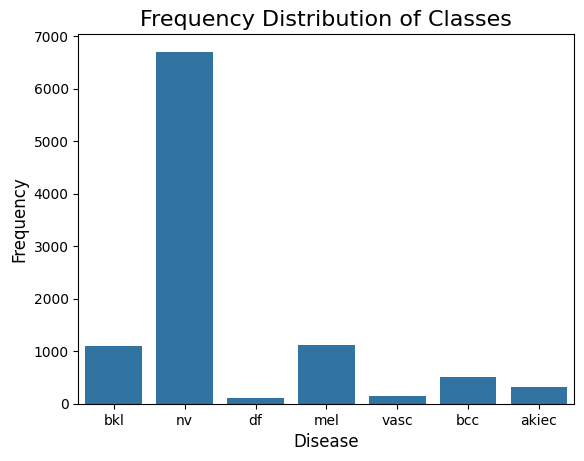

In [25]:
# frequency distribution of different classes (diseases)
sns.countplot(x='dx', data=df)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.show()

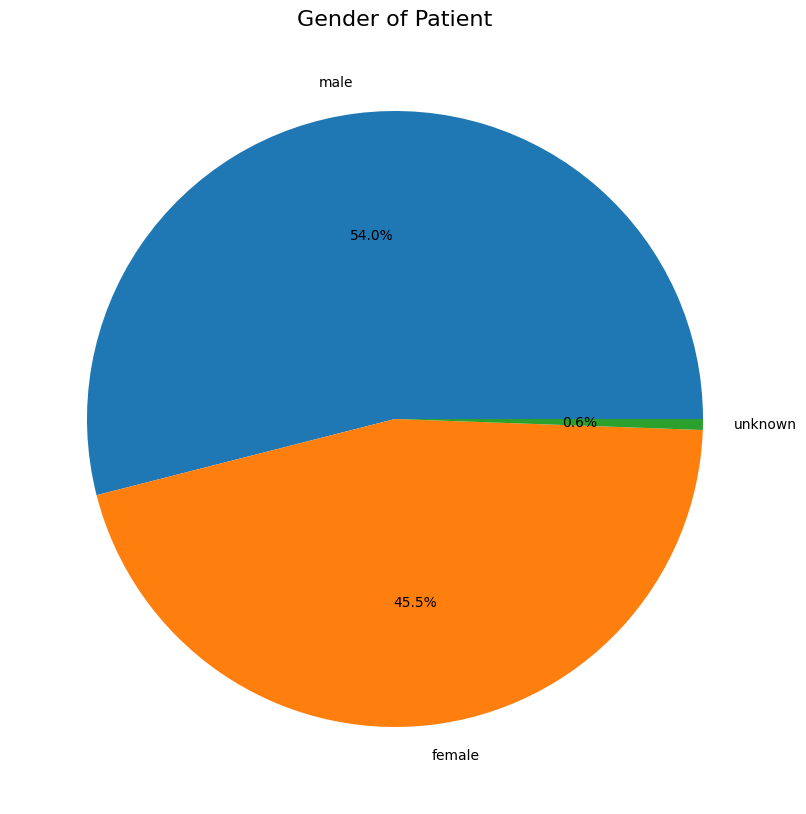

In [26]:
#A pie chart visualizes the gender distribution of patients
bar, ax = plt.subplots(figsize=(10, 10))
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)
plt.show()

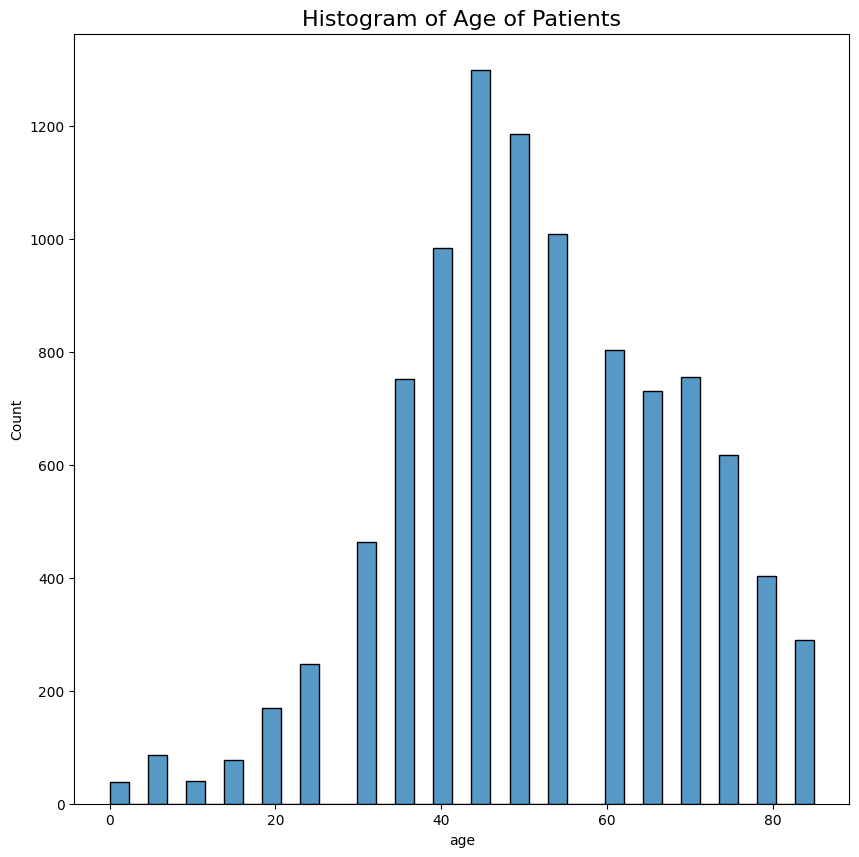

In [27]:
bar, ax = plt.subplots(figsize=(10, 10))
sns.histplot(df['age'])
plt.title('Histogram of Age of Patients', size=16)
plt.show()

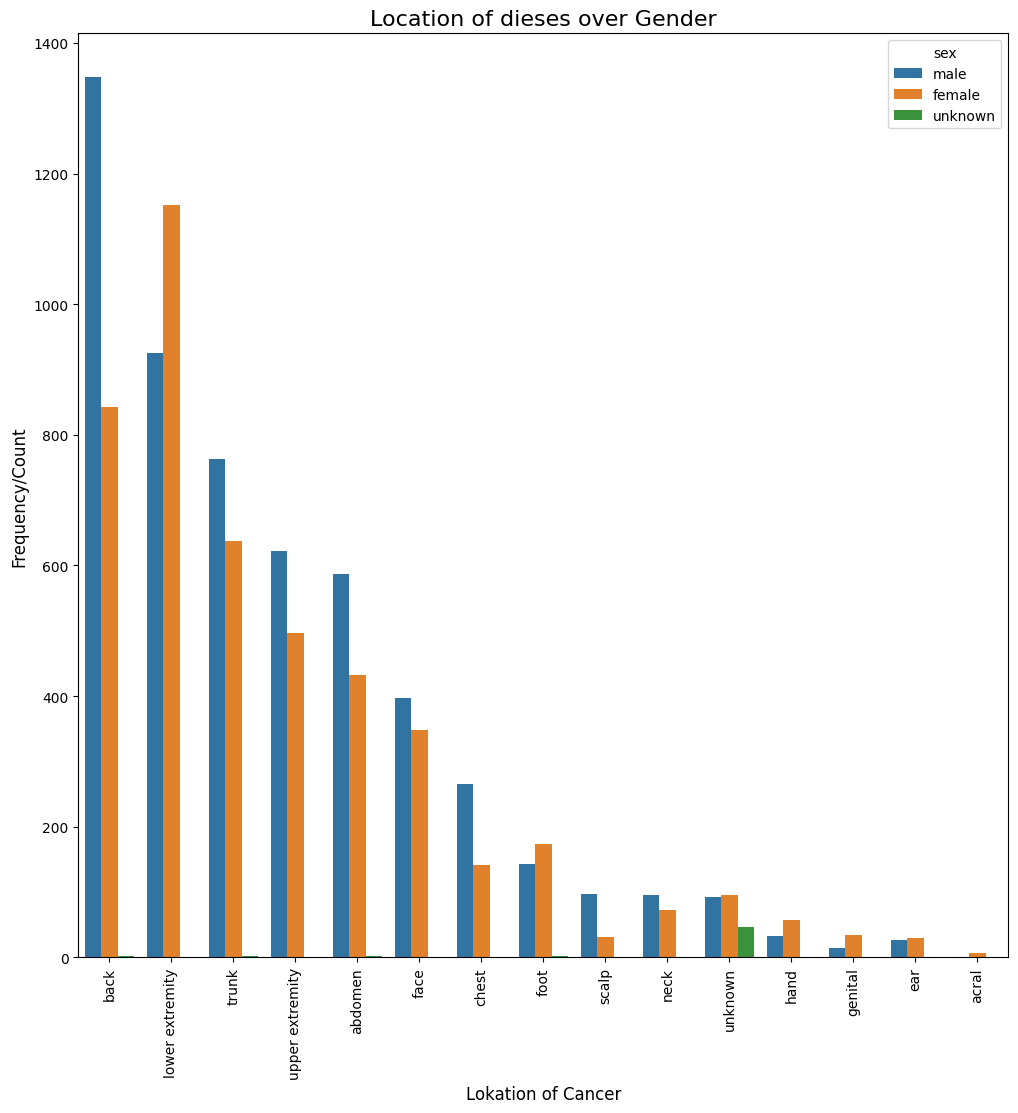

In [28]:
#A bar plot shows the distribution of disease locations across genders
value = df[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1, 0], inplace=True)
temp = value.rename(columns={'localization': 'location', 0: 'count'})

bar, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x='location', y='count', hue='sex', data=temp)
plt.title('Location of dieses over Gender', size=16)
plt.xlabel('Lokation of Cancer', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation=90)
plt.show()

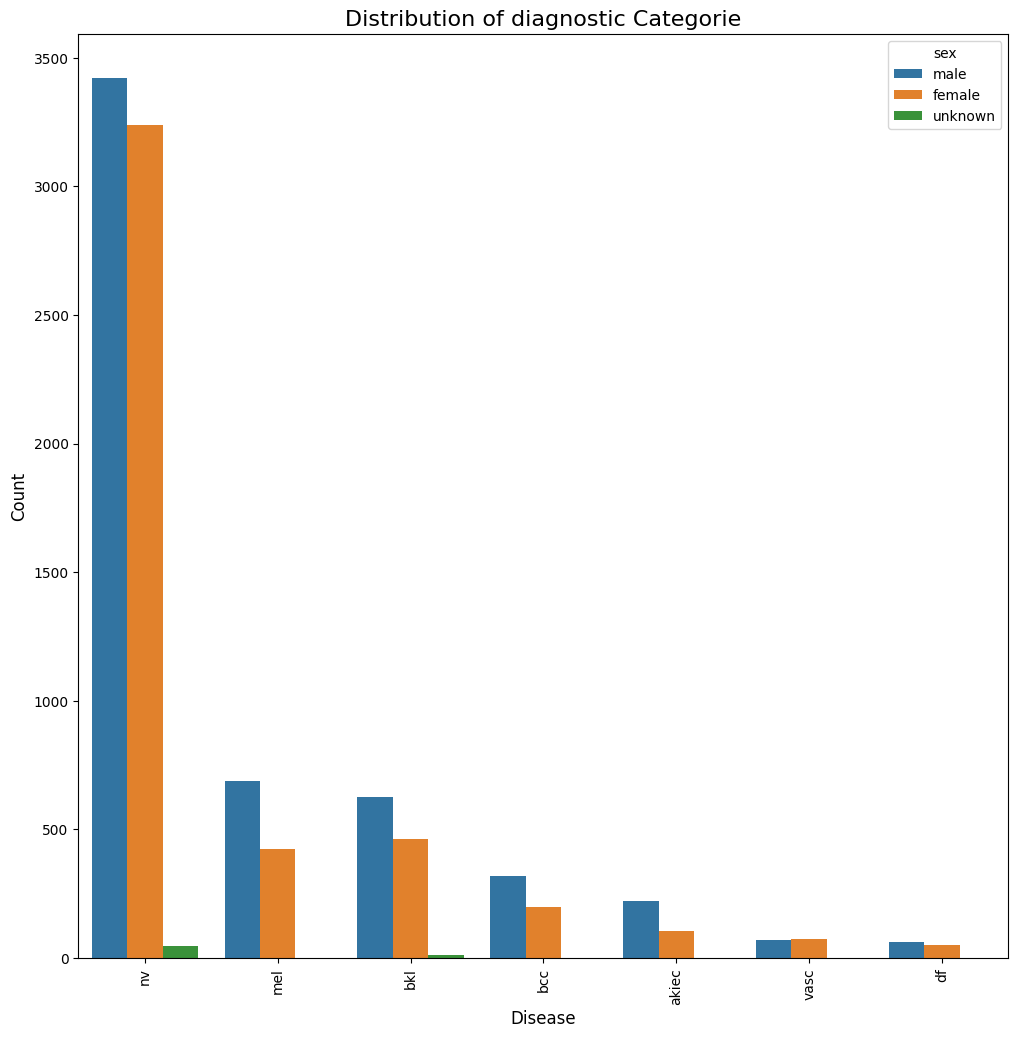

In [29]:
value = df[['dx', 'sex']].value_counts().to_frame()
value.reset_index(level=[1, 0], inplace=True)
temp = value.rename(columns={'dx': 'dx', 0: 'count'})

bar, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x='dx', y='count', hue='sex', data=temp)
plt.title('Distribution of diagnostic Categorie', size=16)
plt.xlabel('Disease', size=12)
plt.ylabel('Count', size=12)
plt.xticks(rotation=90)
plt.show()

In [30]:
counts = pd.DataFrame(df['dx'].value_counts()).reset_index()
counts

,dx,count
0,nv,6705
1,mel,1113
2,bkl,1099
3,bcc,514
4,akiec,327
5,vasc,142
6,df,115


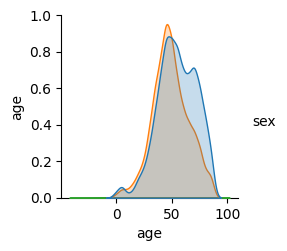

In [31]:
sns.pairplot(df, hue='sex')
plt.show()

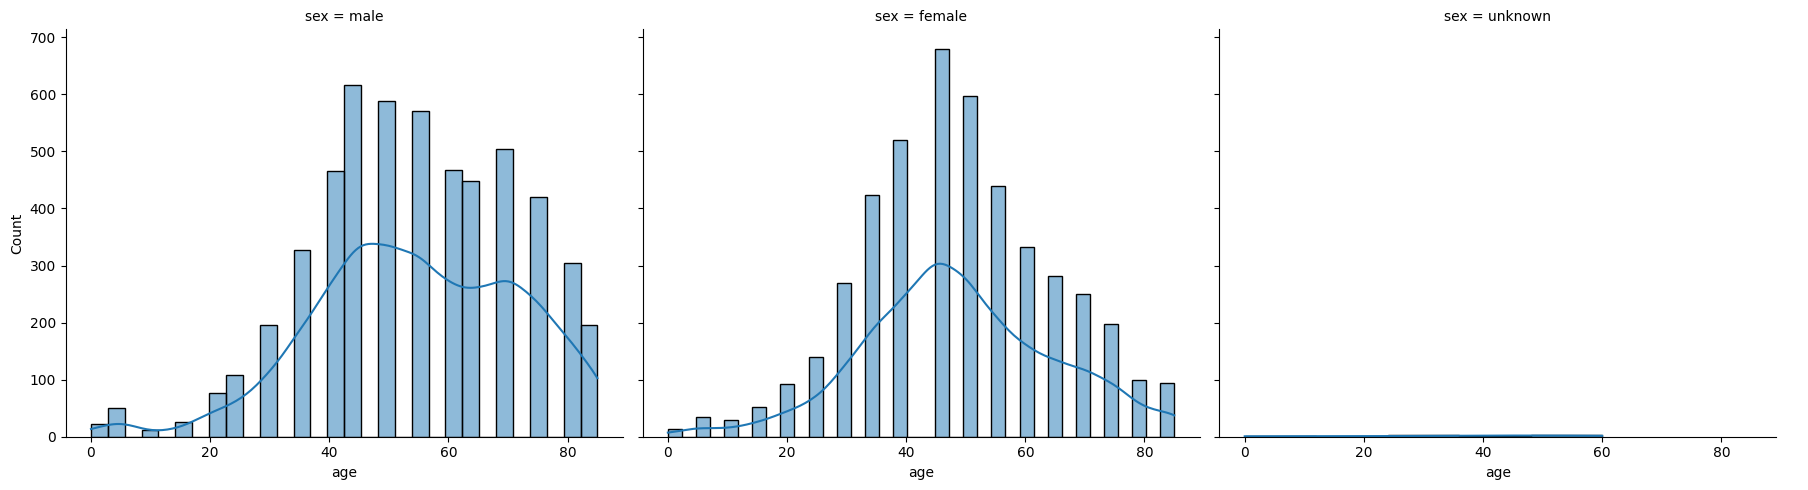

In [32]:
g = sns.FacetGrid(df, col='sex', height=5, aspect=1.2)
g.map(sns.histplot, 'age', kde=True)
g.add_legend()
plt.show()

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB
None


In [34]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


age    57
dtype: int64


In [124]:
df_cleaned = df.dropna()

In [35]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [36]:
dx_dict = {'bkl':0, 'df':0, 'nv':0, 'vasc':0, 'akiec':1, 'bcc':1, 'mel':1}

df['Label']= df['dx'].map(dx_dict)
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,0
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,1
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,1
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,1
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,1


In [37]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,0


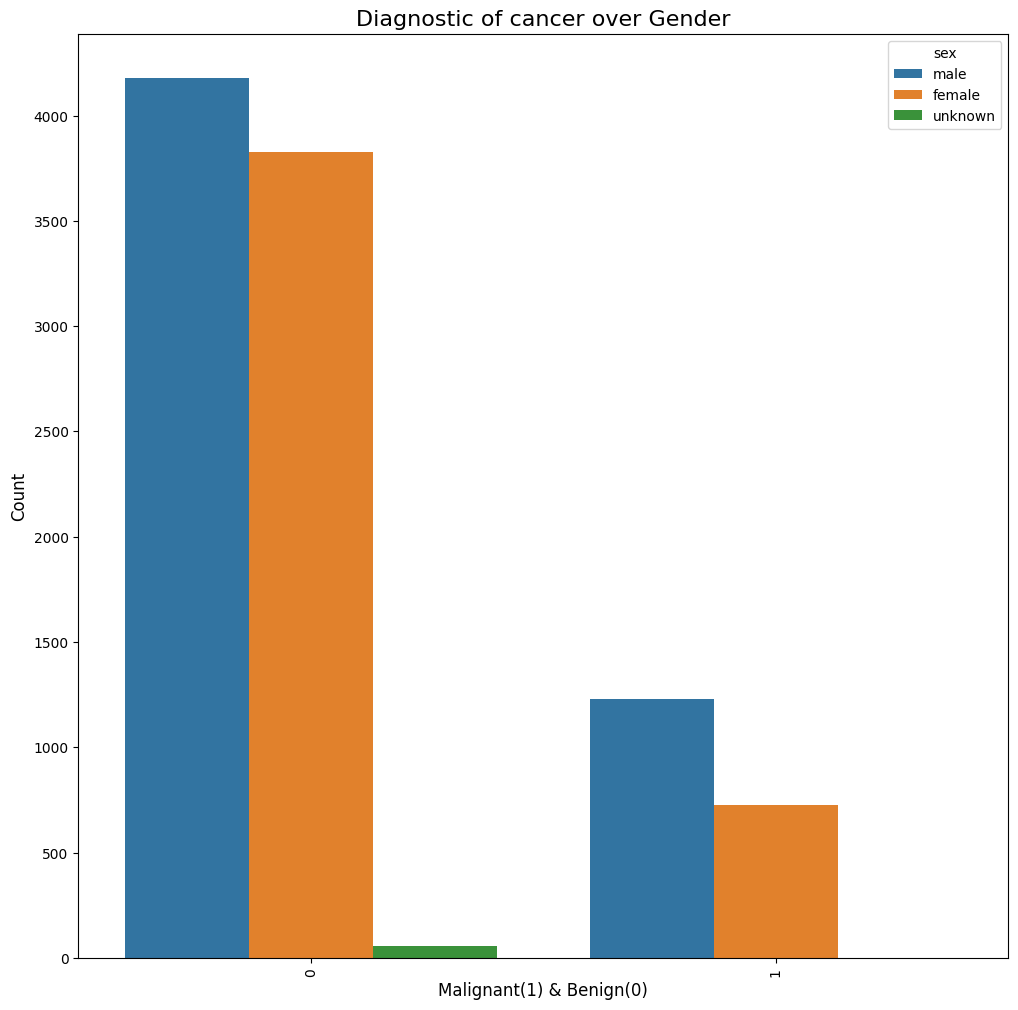

In [38]:
value = df[['Label', 'sex']].value_counts().to_frame()
value.reset_index(level=[1, 0], inplace=True)
temp = value.rename(columns={'Label': 'Label', 0: 'count'})

bar, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x='Label', y='count', hue='sex', data=temp)
plt.title('Diagnostic of cancer over Gender', size=16)
plt.xlabel('Malignant(1) & Benign(0)', size=12)
plt.ylabel('Count', size=12)
plt.xticks(rotation=90)
plt.show()

Oversampling

In [41]:
from imblearn.over_sampling import RandomOverSampler 


In [42]:
y = df['Label']
x = df.drop(columns = ['Label'])


In [43]:
oversample = RandomOverSampler()
x_resampled, y_resampled = oversample.fit_resample(x, y)

In [44]:
y.shape

(10015,)

In [45]:
x.shape

(10015, 8)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
 8   Label         10015 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 704.3+ KB


In [47]:
x['age'].fillna(x['age'].mean(), inplace=True)

/var/folders/dt/nfqgr_s11tjcyclpy8t9qd000000gp/T/ipykernel_9347/1291861742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['age'].fillna(x['age'].mean(), inplace=True)


Kodierung kategorialer Daten

In [48]:
x = x.drop(columns=['lesion_id', 'image_id'])


In [49]:
x = pd.get_dummies(x, columns=['dx', 'dx_type', 'sex', 'localization', 'dataset'], drop_first=True)

RandomForest

In [68]:
df['Label'].value_counts()

Label
0    8061
1    1954
Name: count, dtype: int64